# <center>VAI Academy</center>
# <center> Estatística - Parte 3</center>
___
Todo o conteúdo que você terá acesso ao longo desse período é confidencial, não sendo possível compartilhar ou comercializar os links ou os materiais recebidos que sejam de propriedade da VAI Academy. 

Dessa forma, ao participar do curso você está aceitando os termos de confidencialidade e não-comercialização dos conteúdos que serão recebidos.
___
# <center> Objetivos de aprendizado </center>
- Compreender os conceitos básicos de estatística (e.g. média, mediana, variância, desvio padrão, correlação)
- Compreender os conceitos básicos de probabilidade e sua relação com a estatística
- Formar hipóteses, conhecer e analisar os tipos de erros
___

## Sumário
5. [Fundamentos da Teoria da Probabilidade](#prob)
6. [Inferência estatística](#infstats)
* [Aprofundamento](#aprofund)


**Os conceitos que você vai aprender nessa aula terão grande utilidade em outras etapas da ciência de dados!**

## Carregando Variáveis

Para conseguirmos seguir aprendendo os conceitos a partir de onde paramos no notebook anterior, faremos a leitura de um arquivo pickle na célula a seguir. Não se preocupe em entender o significado da célula a seguir nesse momento, entraremos no detalhe do seu funcionamento mais a frente no curso. O arquivo ```var_AMEM00NB02_parte_3.pkl``` deve se encontrar junto com os arquivos de dados desse notebook. Basta colocá-lo na mesma pasta do seu notebook (caso esteja rodando pelo Jupyter) ou na raiz dos arquivos (caso esteja usando o Colab) e rodar a célula a seguir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

with open("/content/drive/MyDrive/cienciadados/estatistica/dados/var_AMEM00NB02_parte_3.pkl", "rb") as f:
    diamond_df = pickle.load(f)

## Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### 4.5. Correlação

Usamos a correlação para avaliar o quanto pares de variáveis de um mesmo dataset estão relacionados. Entender essas relações é útil para um melhor entendimento do dataset, e para compreender porque podemos usar uma variável para realizar alguma previsão (veremos isso melhor em outras aulas).

Dependendo do conjunto de variáveis no dataset, podemos facilmente inferir e reconhecer pares de variáveis que têm uma forte correlação. Por exemplo, se tiver um conjunto de dados de residências, como preços, tamanho, quantidade de banheiros, bairro, pode-se fazer a hipótese de que o preço e o tamanho estão fortemente correlacionados.

Contudo, nem sempre é fácil identificar estas relações entre as variáveis, ou mesmo descobrir as mais fortes. Para tal, avaliamos o **coeficiente de correlação** entre essas variáveis.

#### 4.5.1. Coeficiente de correlação

O coeficiente de correlação entre duas variáveis é um valor quantitativo (escalar) usado para avaliar quanto uma variável depende da outra. Ele dá um indicativo tanto de direção quanto de intensidade da tendência das duas variáveis variarem em conjunto.

Existem várias técnicas e métricas de correlação disponíveis para diversas situações. Neste curso, utilizaremos o mais comum, que é chamado de **coeficiente de correlação de Pearson** (representado por $r$).

Neste curso, não vamos entrar no detalhe de como funciona a matemática por trás dos bastidores, mas sim nos concentraremos em como ler este coeficiente. Na imagem abaixo, é possível ver diferentes valores para a métrica do R ao quadrado.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Distance_Correlation_Examples.svg/400px-Distance_Correlation_Examples.svg.png" alt="drawing" width="450"/>


O coeficiente de correlação de Pearson é um número real que varia de -1 a +1, e indica o quanto as duas variáveis possuem uma correlação linear. Um $r$ próximo de +1 indica uma relação linear crescente entre as duas variáveis (ou seja se uma aumenta, a outra também o faz de forma proporcional), já próximo de -1, há uma relação linear decrescente. Valores de $r$ próximos de 0 indicam que não há uma dependência linear entre as variáveis, mas note na imagem que elas podem ter outros tipos de dependência.

#### 4.5.2. Matriz de correlação

Uma das melhores formas de ter um panorama geral de como as variáveis de um dataset estão relacionadas é através da Matriz de Correlação, que dá os coeficientes de correlação entre cada par de variáveis. Bem simples, não é? 

Felizmente, os objetos Pandas DataFrame já têm um método para calcular esta Matriz para nós. Na célula seguinte, temos um exemplo de como traçar a matriz de correlação.

In [ ]:
diamond_df.corr().round(2) # pega a matriz de correlação do DataFrame
# A função .round() permite o arredondamento dos dados, para facilitar a leitura

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.00,-0.38,-0.03,-0.10,-0.31,-0.41,-0.40,-0.40
carat,-0.38,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,-0.03,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,-0.10,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,-0.31,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,-0.41,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,-0.40,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,-0.40,0.95,0.09,0.15,0.86,0.97,0.95,1.00


Em seguida, temos um código para mostrar a tabela acima em formato de gráfico! Não se preocupe em decorar todos os detalhes para fazer a figura, mas foque em interpretá-la e ver como a tabela acima se traduz na imagem abaixo! No exemplo, a cor vermelha indica correlação positiva (diretamente proporcionais) e a azul indica correlação negativa (inversamente proporcionais).

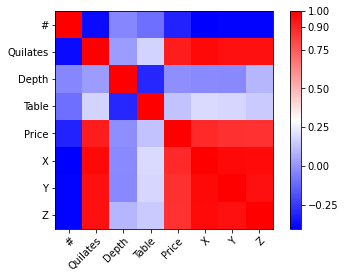

In [ ]:
from matplotlib import cm as cm

corr = diamond_df.corr() # pega a matriz de correlação do DataFrame
labels = ['#', 'Quilates', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'] # As variáveis numéricas que estão em nossa matriz de correlação

# Plotando a matriz
fig, ax = plt.subplots() #Preparar a figura
cmap_bwr = cm.get_cmap('bwr') #Buscar o colormap (mapa de cores, cmap) chamado 'BWR', ele é o Blue-White-Red (Azul-Branco-Vermelho)
cax = ax.imshow(corr, cmap=cmap_bwr) #Mostrar nossa matriz de correlação, seguindo o cmap anterior

ax.set_xticks(np.arange(len(labels))) #Adicionar todas as marcações no eixo X
ax.set_yticks(np.arange(len(labels))) #Adicionar todas as marcações no eixo Y

ax.set_xticklabels(labels) #Escrever todas as marcações no eixo X
ax.set_yticklabels(labels) #Escrever todas as marcações no eixo Y

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor") #Deixar o eixo X com as marcações inclinadas

fig.colorbar(cax, ticks=[-0.25,0,.25,.50,.75,.9,1]) #Colocar uma barra de legenda ao lado
plt.show() #E mostrar na tela

Com isso podemos analisar como a variável `price` está intimamente ligada à variável `carat` e às variáveis de dimensão do diamante, `x`, `y` e `z`. Além disso, as variáveis `depth` e `table` são inversamente proporcionais e essas duas variáveis não tem grande relação com qualquer outra

#### 4.5.3. Scatter Plot

Outra ferramenta útil para entender como duas variáveis se comportam entre elas é traçando o *Scatter Plot* (ou Gráfico de dispersão).  Neste gráfico, os dados são exibidos como um aglomerado de pontos, onde cada ponto é um dado do dataset e sua posição é definida pelo valor do dado na posição da variável representada no eixo horizontal e o valor da outra variável do eixo vertical.

O Scatter Plot é normalmente utilizado para entender se existe alguma correlação entre as características (variáveis) e, se sim, ele ajuda a determinar se a correlação é positiva ou negativa. Se os pontos apresentam um padrão inclinado vindo da esquerda para a direita e de baixo para cima, isso indica uma correlação positiva entre as variáveis em estudo. Se o padrão de pontos segue uma inclinação da parte superior esquerda para a parte inferior direita, isso indica uma correlação negativa.

Para uma visualização ainda mais clara, é possível ter uma terceira dimensão indicando a densidade (concentração) de pontos numa determinada região do gráfico. Na célula seguinte, é mostrada uma forma simples de traçar um Scatter Plot. Para explorar outros métodos de visualização de duas variáveis, [clique aqui](https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas).

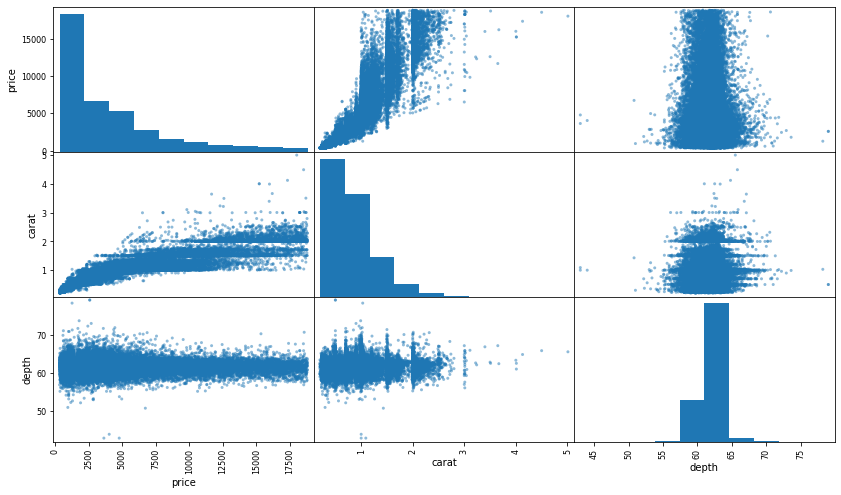

In [ ]:
# Produz uma matriz das variáveis, par a par
# A opção figsize = (14,8) permite definirmos um tamanho específico da visualização, facilitando a visualização
pd.plotting.scatter_matrix(diamond_df[['price', 'carat', 'depth']], figsize = (14,8), diagonal = 'hist');

#### 4.5.4. Correlação não implica uma causalidade!

Um equívoco realmente comum ao analisar dados é inferir que a correlação implica uma causa (ou seja, uma variável causa a outra). Isso não é necessariamente verdade! Vamos ilustrar isto com um exemplo simples. Vamos pensar que, quando chove, Jennifer prefere ficar em casa. Mas também, quando chove, o ar fica húmido, o que faz com que a sua alergia ataque. Se Jennifer esquece que a chuva foi a causa para ela ficar em casa, ela pode atribuir erroneamente que o fato de não sair fez com que a sua alergia apareça! Mas, na verdade, a chuva é a causa de ambos os eventos.

Esse exemplo pode parecer óbvio, mas, na maioria das vezes, é difícil encontrar todas as variáveis que influenciam um determinado evento e a sua ordem causal. Então, da próxima vez que alguém disser que uma variável causou outra por estarem altamente correlacionadas, duvide disso!

<a id='prob'></a>
## 5. Fundamentos da Teoria da Probabilidade

#### 5.1. Variáveis aleatórias

As variáveis aleatórias são definidas como qualquer variável cujos possíveis resultados dependem de um fenómeno aleatório. 

Um exemplo de uma variável aleatória é um que já vimos: o resultado do lançamento de um dado, que pode dar qualquer número entre 1 e 6. Embora possamos conhecer os seus possíveis resultados, o resultado em si depende do acaso. Assim, uma variável aleatória pode ser uma medição de um parâmetro que pode gerar valores diferentes.

Existem dois grandes grupos de variáveis aleatórias: **numéricas** e **categóricas**.

Acho que essa divisão não nos é estranha, não é mesmo? Se você não lembra da diferença entre esses dois, explicamos ela na seção [4.1 Tipos de variáveis](#variables) da parte 1

### 5.2. Distribuições de probabilidade

Apesar de aleatórios, ao longo da história foi preciso entender como determinados fenômenos iríam se comportar. Assim, as distribuições de probabilidade são usadas para descrever de forma matemática a característica com que um fenômeno aleatório se manifesta.

Em outras palavras, as distribuições de probabilidade são modelos matemáticos (ou funções) que relacionam um certo valor da variável em estudo com a sua probabilidade de ocorrência. Antes de eu jogar um dado, por exemplo, eu não sei qual o número que sairá no dado, mas podemos saber a chance de cada possibilidade!

Como a Teoria da Probabilidade é toda uma área de estudo da Matemática, não desanime caso você não entenda os passos matemáticos, a matemática é para construir a base teórica! 

<img src = "https://i.imgur.com/7SsqFe5.jpg" alt="drawing" width="450"/>

*aprendendo sobre Probabilidade e Estatística *

Tente focar em entender os conceitos. Novamente, caso tenha dúvidas, não deixe de mandar lá no nosso servidor do Discord, combinado?

Além disso, o site [seeing-theory](https://seeing-theory.brown.edu/index.html)  permite visualizar de forma simples muitos dos conceitos que vamos ensinar aqui, então não deixe de conferir e brincar um pouco por lá!

Dito isso, vamos nessa!


#### 5.2.1. O que é a função massa de probabilidade (fmp)?

Como dissemos na seção anterior, uma variável aleatória numérica discreta é uma variável que pode assumir um número contável de valores possíveis, e, ao realizar uma medição dessa variável, cada valor possível tem uma certa probabilidade de ocorrer.

Descrevendo de forma matemática, geralmente denotamos uma variável aleatória como $X$. Assim o valor da função de massa de probabilidade corresponde à probabilidade de a variável $X$ assumir um determinado valor $x$. Apesar de serem denotadas pela mesma letra, o $X$ maiúsculo representa a variável aleatória e o $x$ minúsuclo representa o valor da ocorrência da V.A.. Numa notação matemática, podemos escrever isto como:

\begin{equation*}
P(X = x) \text{, ou simplesmente } p(x)
\end{equation*}

Por exemplo, no lançamento de dados temos seis resultados possíveis (1, 2, 3, 4, 5, 6), cada um deles com uma probabilidade igual a 1/6 de ocorrer. Ou seja, podemos escrever que:

\begin{equation*}
P(X = 1)=p(1)=\frac{1}{6}
\end{equation*}
\begin{equation*}
P(X = 2)=p(2)=\frac{1}{6}
\end{equation*}
<center>
...
</center>

Podemos ler isso como "A probabilidade da minha observação, que é o número no dado, ser igual à 1 é de 1/6".

É comum representar a função massa de probabilidade utilizando gráficos onde o eixo x apresenta todos os valores possíveis para a variável e o eixo y apresenta as probabilidades desses valores (ou a **função massa de probabilidade - f.m.p.**).

Abaixo, utilizamos algumas linhas de código para traçar o gráfico da f.m.p.

##### Exemplo 1

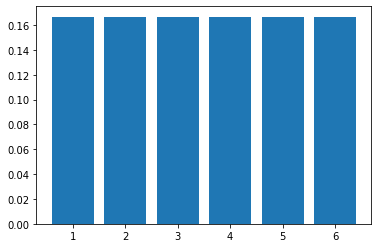

In [ ]:
# definindo todos os resultados possíveis
x_axis = [1, 2, 3, 4, 5, 6]

# definindo a probabilidade associada a cada valor
y_axis = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# plotando a fmp
plt.bar(x_axis, y_axis)
plt.show()

Em nosso exemplo dos diamantes, a qualidade do diamante é uma variável aleatória discreta! Não conseguimos saber qual a qualidade antes de um especialista determinar, mas podemos descobrir a chance de ser de cada classe, baseado em nosso conjunto de dados!

Isso foi exatamente o que vimos no começo nessa aula com a `crosstab` com a opção `normalize = True`

In [ ]:
pd.crosstab(index=diamond_df["cut"], columns="count", normalize=True)

col_0,count
cut,
Fair,0.029848
Good,0.090953
Ideal,0.399537
Premium,0.255673
Very Good,0.223990


Isso quer dizer que a chance de um diamante ser 'Ideal', que significa o nível de qualidade mais alta, em nossa base de dados, é de 0.399537 ou de 39.95%, aproximadamente!

Porém, algo importante a se considerar é que estamos limitados à essa base de dados! Pode ser que essa base não represente todos os diamantes do mundo, de todos os países, por exemplo, então não podemos generalizar sem conhecimento do que essa base de dados tenta representar!

#### 5.2.2. O que é a função densidade de probabilidade?

Por outro lado, temos também variáveis aleatórias contínuas, que, ao contrário das discretas, têm infinitos resultados possíveis. Isto significa que a **probabilidade de uma variável contínua ser exatamente igual a um único número x é zero**.

Sim, existem eventos que têm probabilidade zero, o que não quer dizer que são impossíveis! Parece bem estranho, não é? Para entendermos melhor, vamos pegar o número:

3.141592653589793238462643383279502884197169399375105820974944592307...

(também conhecido como **pi** ou $\pi$, e tem infinitas casas decimais).

A probabilidade de um número ser exatamente igual a um número que tem infinitas casas decimais é nula! Caso queira entender melhor, assista esse vídeo do canal 3Blue1Brown [Why “probability of 0” does not mean “impossible”](https://youtu.be/ZA4JkHKZM50).

Usando a mesma notação matemática que na sessão anterior:

\begin{equation*}
 P(X = x) = p(x) = 0
\end{equation*}

Assim, quando estamos lidando com variáveis contínuas, nunca esperamos que estas tenham um valor preciso. Em vez disso, medimos a probabilidade de ela estar dentro de um certo intervalo de valores. Por exemplo, estar entre a e b:

\begin{equation*}
 P(a < X < b) = p(a, b)
\end{equation*}

##### Exemplo 2

Imagine um carro que andou do km 0 para o km 10 com velocidade constante. Agora digamos que queremos tirar uma foto desse carro no trajeto, mas a câmera só alcança o trajeto entre 0km e 1,75km. Se quisermos tirarmos uma foto aleatória desse carro em qualquer momento do trajeto, qual é a probabilidade de o carro aparecer na foto? (ou seja, de estar antes do quilômetro 1,75?)

Bom, como a velocidade é constante, a probabilidade é a mesma em qualquer posição entre 0 e 10 (parecido com o exemplo de jogar dados, mas o carro pode estar no km 0, no km 3.2 ou km 1.259282613987).

Dito isto, podemos usar a mesma lógica para construir uma **função de densidade de probabilidade**. É comum nos referirmos a essas funções por sua sigla, então perdão se parecer rude, mas a sigla dessa função é f.d.p. (ou pdf, do inglês *probability densitiy function*).

\begin{equation*}
pdf = f(x) = \frac{1}{10-0}
\end{equation*}

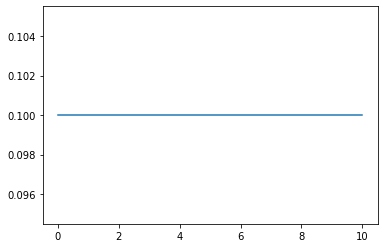

In [ ]:
# definindo alguns dos valores possíveis da posição do carro (quanto mais valores, mais preciso é o plot)
x_axis = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

# definindo a densidade de probabilidade associada a cada valor
y_axis = (1/(10-0))*np.ones(len(x_axis)) # Obtendo um array de mesmo tamanho de x_axis com os valores (1/10) em cada casa

# plotando os gráficos
plt.plot(x_axis, y_axis)
plt.show()

Como discutimos, a pdf não têm um sentido físico claro, mas ela tem uma propriedade muito importante: para qualquer distribuição, a **área em baixo do gráfico da função de densidade de probabilidade é igual à probabilidade de uma variável contínua estar dentro intevalo dessa área**. 

Assim, se quisermos calcular a probabilidade de o carro estar entre 0 e 1,75, calculamos a área abaixo da curva da função de densidade entre 0 e 1,75. Neste caso particular, a área pode ser simplesmente calculada como a área do retângulo:

\begin{equation*}
 p(0, 1.75) = (1.75 - 0)*\frac{1}{10-0} = 0.175
\end{equation*}

Agora voltando à nossa base de dados de diamantes, a variável carat é uma V.A. contínua! Ela depende de uma medição e, pode ser que o diamante seja de 0.5 quilates ou 0.5000001 quilates!

Vamos tentar identificar a chance de encontrarmos um diamante de menos de 600 dólares!

In [ ]:
price_600 = len(diamond_df[diamond_df['price'] <= 600])
N = len(diamond_df)

perc_600 = price_600 / N
print("P(price <= 600) = ", perc_600)


P(price <= 600) =  0.07667779013718946


Logo, a chance de um diamante custar 600 dólares ou menos é de 0.0766 ou 7.66%!

#### Exercício 5.1
Tente calcular a probabilidade de encontrarmos um diamante com mais de 4mm de largura!

In [ ]:
N = len(diamond_df)
perc_x_4 = len(diamond_df[diamond_df['x'] > 4]) / N
print("P(X > 4) = ", perc_x_4)

P(X > 4) =  0.9908045977011494


#### 5.2.3. Função distribuição acumulada

Outra forma útil de determinar a probabilidade de um evento é usando a **função distribuição acumulada** (fda) ou *Cumulative distribution function* (cdf). A fda é definida como a probabilidade de a variável ser inferior a um determinado x. É comum representar uma pdf (função de densidade de probabilidade) como $f(a,b)$ e uma fda como $F(x)$:

\begin{equation*}
F(x) = P(X < x)
\end{equation*}

Usando a propriedade da pdf, podemos determinar a fda como sendo a área em baixo do gráfico da pdf até determinado valor $x$.

<center>
<img src = "https://i.imgur.com/UvRKGcj.gif" alt="drawing" width="300"/>
</center>

\begin{equation*}
 F(x) = P(X < x) = p(-\infty, x)
\end{equation*}

Note-se que ao utilizar a fda, inserimos como parâmetro apenas um único valor $x$, que representa um intervalo (de menos infinito a esse valor) e que nos permite calcular a probabilidade de a variável ser menor do que aquele valor.

Utilizando o exemplo do carro, podemos calcular a fda para calcular a probabilidade de o carro estar antes do quilômetro 1,75 da seguinte forma:

Para todo x entre 0 e 10:

\begin{equation*}
f(x) = \frac{1}{10-0}=0.1
\end{equation*}

Assim, a área do retângulo até o valor x é dada por:

\begin{equation*}
F(x) = P(X<x)= (x-0) \cdot \frac{1}{10-0}
\end{equation*}

(se você souber integral e quiser fazer esse cálculo para verificar que dá igual, fique à vontade!)

Agora que calculámos a fda do carro, sabemos que, para qualquer posição $x$ do carro entre 0 e 10, a probabilidade de o carro estar antes dessa posição é de $0,1\cdot x$. Agora, vamos traçar a curva da fda e verificar se o nosso cálculo anterior estava correto!

##### Exemplo 3

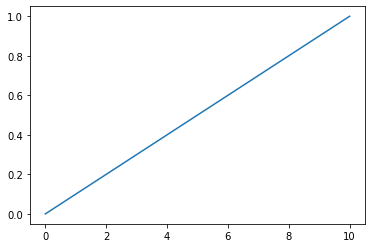

A probabilidade de o carro estar antes do km 1,75 é de: 0.175


In [ ]:
def fda(x):
    y = 0.1*x
    return y

# aqui, usamos um array para poder facilmente multiplicar os valores na função fda
x_axis = np.asarray([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10])

# definindo a probabilidade acumulada associada a cada valor
y_axis = fda(x_axis)

# plotando os valores (sim, ainda estamos te devendo ensinar como usar o plot, mas te juro que logo logo chegaremos lá)
plt.plot(x_axis, y_axis)
plt.show()
print("A probabilidade de o carro estar antes do km 1,75 é de: {:.3f}".format(fda(1.75)))

#### 5.2.4. Propriedades importantes das fdp's e fda's

Estamos quase terminando toda a teoria por trás dessas funções, eu prometo que só faltam mais algumas equações!

Você pode estar se perguntando ~"Oh meu Deus, este sofrimento vai acabar?"~ "Ei, qualquer função pode ser uma função de probabilidade?". E a resposta é NÃO! (para ambas as perguntas rs). Como estamos falando de probabilidade, existem três propriedades principais:

Como todos nós somos pessoas **apaixonadas** por equações matemáticas, vamos escrevê-las corretamente usando as nossas definições de fdp e fda.

1.   Nenhum evento tem mais do que 100% de chance de acontecer, ou $\text{max}[P(x)] = 1$
2.   A probabilidade de todos os resultados possíveis deve ser de 100%
3.   Finalmente, **não existe probabilidade negativa**. Isto significa que todos os valores da fdp são sempre não negativos e a fda é sempre uma função não decrescente.

### 5.3. Distribuição gaussiana ou normal

Como vimos, as variáveis aleatórias estão em todos os lugares! Além disso, existem alguns padrões, ou formatos, mais comuns das probabilidades! Por exemplo, se imaginarmos um gráfico que mostra as probabilidades de cada valor ao rolar um dado de 6 faces e se imaginarmos um gráfico que mostra a chance de tirar uma carta de um baralho de 52 cartas veremos muitas semelhanças!

É claro que no dado temos 6 lados, com chance de $1/6$ de tirarmos qualquer face, enquanto que no baralho a chance de tirar uma carta é de $1/52$. Porém a chance é a mesma pra cada face do dado, e para carta, não há uma carta com mais chance.

Esse "formato", ou distribuição das probabilidades se chama uniforme, por exemplo, onde a chance é a mesma para cada possibilidade do meu universo! É algo bem comum, está nos dados, cartas, jogar cara ou coroa de moedas, etc!



Porém outro formato bem comum é uma distribuição com um pico onde há a maior chance do evento ocorrer, e quanto mais próximo desse pico, maior é a probabilidade!

Exemplificando! Se formos medir a altura dos brasileiros veremos que a maioria tem em torno de 1,70m! Mas a chance de encontrarmos alguém com 1,71m é bem alta também, praticamente igual à chance de encontrarmos alguém com 1,69m!

Há chance de encontrar alguém com 1,9m mas será bem menor que 1,70m! E essa chance será igual à encontrar alguém de 1,50m, nesse exemplo!

<center>
<img src = "
https://www.researchgate.net/profile/Stephen_Zubrick/publication/264533994/figure/fig1/AS:614220462821377@1523452978655/An-example-of-a-normal-distribution-height-distributions.png" alt="heights" width="700"/>
</center>

Esse formato, ou distribuição, é a gaussiana, ou chamada de normal! Ela tem o forma de um sino e a média é igual a mediana, sendo simétrica!

Ela é muito usada na estatística por descrever bem fenômenos naturais onde alguma característica tem maior incidência na média e diminui sua frequência a medida que se afasta dela (como, por exemplo, a altura de uma população). Além disso, essa função é muito poderosa! Apenas com uma média e uma variância podemos gerar funções completamente diferentes.

<img src = "https://i.imgur.com/glimE9J.png" alt="drawing" width="400"/>

Como vimos na parte anterior, a média influencia em qual valor estão concentrados o valor das amostras, e a variância nos diz o quanto os valores estão dispersos! Na seção 4.3.2 geramos um gráfico com um formato bem parecido com a normal, não é?

Pois é! Existe até um teorema muito importante que diz que **quando o tamanho da amostra aumenta, a distribuição da média de uma variável aleatória aproxima-se cada vez mais de uma distribuição normal**. Esse é o Teorema do Limite Central (TLC).

Este processo pode ser visualizado na animação abaixo. O primeiro gráfico corresponde à distribuição da variável aleatória (pode ser de **qualquer tipo**, não necessariamente uma distribuição gaussiana/normal).

O segundo mostra agrupamentos de $N=5$ amostras da distribuição. Finalmente, o gráfico final mostra o **histograma da média das amostras**.

<img src="https://i.imgur.com/Dh5OHoB.gif" alt="as" width="350"/>

Você pode brincar com esse tipo de problema [aqui](http://onlinestatbook.com/stat_sim/sampling_dist/index.html) ou [aqui](https://seeing-theory.brown.edu/probability-distributions/index.html#section3)! Sinta-se à vontade para experimentar diferentes distribuições de amostras e ver que todas convergem para uma distribuição normal!

O que você acha que acontece se aumentarmos aos poucos $N$, o número de amostras que usamos para calcular a média? Intuitivamente, podemos esperar ver a média variar cada vez menos a medida que aumentamos o número de amostras, certo? Isso mesmo!

Nesta aula específica saber que as variáveis independentes aleatórios se comportam como uma normal pode não significar muito, mas muitos modelos de inteligência artificial usam essa propriedade para fazer previsões dos dados! Além disso, essa função é importante para diversas áreas, e certamnete você irá se deparar com ela caso escolha se aprofundar em alguns tópicos da ciência de dados! Por enquanto saber que ela existe e da propriedade do TLC é o suficiente!

### 5.4. Teorema de Bayes

Antes de apresentar o Teorema de Bayes, precisamos entender o conceito de probabilidade condicional. Vejamos o seguinte exemplo:
Uma empresa tem 2 fábricas diferentes que produzem peças para automóveis (F1, F2). Cada fábrica tem um número de peças com defeito (D) e não defeituosas (ND), de acordo com os seguintes dados:

In [ ]:
# Criando um DataFrame com as informações de produção
total_production = pd.DataFrame({'F1':[30,70],
                                 'F2':[10,90]},
                                index=['D', 'ND'])

# Criando a coluna 'total'
total_production['total'] = total_production['F1'] + total_production['F2']

# Criando a linha total
total_row = total_production.sum(numeric_only=True)
total_row.name = "Total"

# Apendando a linha no DataFrame
total_production.append(total_row, ignore_index=False)

,F1,F2,total
D,30,10,40
ND,70,90,160
Total,100,100,200


Se escolhermos uma peça de produção defeituosa aleatória, qual é a probabilidade de ser da fábrica 1? Olhando o espaço de amostra de D, notaremos 40 peças defeituosas, sendo 30 de F1.

Assim, nossa probabilidade seria:

\begin{equation*}
 P(F1|D) = \frac{30}{40} = \frac{3}{4}
\end{equation*}
<br>
A notação $\ P(F1|D) =$ significa a probabilidade de a peça ser da fábrica 1, dado que ela é uma peça defeituosa

Poderíamos, também, conseguir o mesmo resultado aplicando a seguinte equação:

\begin{equation*}
 P(F1|D) = \frac{P(F1 \cap D)}{P(D)} = \frac{30/200}{40/200} = \frac{3}{4}
\end{equation*}

O símbolo $\cap$ usado acima significa a "interseção". Ele é usado para obter o conjunto de elementos que pertencem simultaneamente a dois conjuntos, e pode ser substituído na leitura pelo termo **e**.

Assim, podemos ler a equação acima como: a probabilidade de a peça ser da fábrica 1, dado que ela é uma peça defeituosa, é igual à probabilidade de a peça ser defeituosa **e** ser da fábrica 1, dividido pela probabilidade de a peça ser defeituosa.

**De forma geral**
<br>
\begin{equation*}
P(A\cap B) = P(A|B) \cdot P(B)
\end{equation*}

Lemos a equação como: a probabilidade de $A$ **e** $B$ acontecerem é igual à probabilidade de $A$ acontecer, sabendo que $B$ ocorreu, multiplicado pela probabilidade de ocorrência de $B$.

Dessa forma, o **Teorema de Bayes** é relacionado com a **probabilidade condicional** e descreve a probabilidade de um evento, baseado em um conhecimento prévio que pode estar relacionado ao evento. Com isso, ele pode ser usado para estimar uma probabilidade a partir de diferentes hipóteses, à medida que novas evidências são observadas.

Ele pode ser escrito matematicamente como:
\begin{equation*}
P(A|B)   = \frac{P(B|A) P(A)} {P(B)}
\end{equation*}

#### Exercício 5.2
Estime a $P_Y$ de um diamante ser ideal, a $P_Z$ de um diamante ter mais de 1 quilate e a probabilidade (p_1) do diamante ter mais de 1 quilate, sabendo que ele é ideal

In [ ]:
# Estimando a probabilidade de um diamante ser ideal
p_Y = len(diamond_df[diamond_df.cut  == 'Ideal']) / len(diamond_df)


# Estime a probabilidade de um diamante ter mais de 1 quilate
diamond_df['carat_1_quilate'] = (diamond_df.carat > 1)
p_Z = sum(diamond_df['carat_1_quilate'])/len(diamond_df)

# Selecione apenas o grupo de diamantes ideial
ideal_diamond = diamond_df[diamond_df.cut == 'Ideal']

# Agora estime a probabilidade de um diamante ter mais de 1 quilate
# sabendo que ele é ideal
p_1 = ideal_diamond.carat_1_quilate.mean()

# Printando os resultados
print('p_Y =', round(p_Y,3))
print('p_Z =', round(p_Z,3))
print('p_1 =', round(p_1,3))

p_Y = 0.4
p_Z = 0.324
p_1 = 0.263


Beleza! Mas o que significam estes números? Antes de continuar a ler a resposta **pense nessas perguntas abaixo**, pois elas podem dar bons insights:

1. O que significa $p_Y$ ser aproximadamente $0,4$? Isso é desejável?
2. $p_1$ diminuiu comparado ao $p_Z$? Será que segregar dessa forma nos deixou mais próximos de encontrarmos nosso `target`? Isso faz sentido?

Tem certeza de que já pensou nas perguntas de cima? Ótimo! Então vamos tentar responder a estas perguntas:

1.  **O que significa $p_Y$ ser aproximadamente $0,4$? É desejável?**
* Existem 5 categorias de diamantes em nossa base de dados, sendo 'Ideal' a qualidade máxima. Caso tivéssemos dados proporcionais, cada classe de qualidade teria 20%! Em nosso caso temos um grande número de diamantes 'Ideal' e poucos 'Fair' e 'Good', que são de qualidade menor! Isso pode ser um problema, pois o nosso conjunto de dados não é totalmente **balanceado**, apesar de não estar tão longe disso também! 

* Em ciência de dados é muito desejável ter uma proporção parecida em todas as classes pois conseguiríamos aprender melhor sobre o que torna um diamante 'Fair' e 'Good', por exemplo, para evitar o 'Enviesamento'! Uma das conseqüências do enviesamento dos dados é que fazer inferências estatísticas com base nestes dados não nos daria boas estimativas sobre os parâmetros reais.

2.  **$p_1$ diminuiu comparado ao $p_Z$?**
* Nesse caso sim! Aparentemente selecionar apenas entre os diamantes ideais não nos deixou mais próximos de identificarmos diamantes de mais de um quilate! Nesse caso, a chance de encontrarmos um diamante com mais de 1 quilate ao acaso é maior que a chance de encontrarmos um diamante de mais de 1 quilate, sabendo que ele tem uma qualidade alta! 

#### Exercício 5.3

Com base nas probabilidades estimadas anteriormente, use o **Teorema de Bayes** para calcular a probabilidade condicional de o diamante ser Ideal dado que ele tem mais de 1 quilate. Isto é, a probabilidade de:

\begin{equation*}
P\left(\;Y = Ideal\;|\;X > 1\;\right) = \frac{P\left(\;X > 1\;|\;Y = Ideal\;\right) P\left(\;Y = Ideal\;\right)} {P\left(\;X > 1\;\right)}
\end{equation*}

In [ ]:
# Escreva sua resposta aqui:
p_2 = (p_1*p_Y)/(p_Z)

print(p_2)

0.3235058850417096


Olha só! A probabilidade de acharmos um diamante Ideal dentre aqueles com mais quilates é de 21%! Menor do que acharmos ao acaso. Logo, não seria bom construirmos um modelo que identifica diamantes perfeitos com base no peso dele (ou quilates)!

Sempre é bom fazer hipóteses em relação a nossos dados e validá-las antes de aplicar qualquer modelo de machine learning.

### 5.5. Relação entre Probabilidade e Estatística

Probabilidade e Estatisstica podem parecer muito semelhantes entre si, mas, na verdade, resolvem problemas inversos. Em Probabilidade, partimos de um processo que contém alguma incerteza (expressa através de variáveis aleatórias) e estudamos o que acontece de acordo com a aleatoriedade do processo. Por outro lado, na Estatística, começamos analisando alguns dados e tentamos encontrar o processo aleatório que está por trás de nossas observações.

É por isso que a Probabilidade é tão importante para a Estatística: a probabilidade nos dá as ferramentas para as respostas que estamos buscando. Assim, nosso trabalho em Estatística é encontrar qual dessas ferramentas é a correta para o problema com o qual estamos lidando. Quanto mais variáveis aleatórias você conhecer e souber como trabalhar, mais fácil e mais preciso será seu trabalho!

#### 5.5.1. Exercício extra

Agora, deixe as calculadoras e Python de lado por um minuto. Você pode resolver este exercício sem nenhum cálculo, basta pensar no problema.

Este é um problema famoso da segunda guerra mundial. Os aviões dos Aliados estavam sendo fortemente derrubados pelo armamento alemão. Eles precisavam de uma armadura melhorada para lidar com todo o poder de fogo disparado sobre eles. O problema é:
* Um avião com pouca blindagem não aguenta muitos tiros e será derrubado facilmente.
* Um avião com forte blindagem é menos manobrável e consome mais combustível por ser mais pesado.

Dessa forma, era necessário estudar quais partes do avião eram mais afetadas pelas balas inimigas e reforçar apenas elas.

Para isso, os militares fizeram um levantamento com os aviões que retornaram das campanhas para entender quais eram os locais mais atingidos pelos tiros. Os resultados obtidos estão na tabela a seguir e indicam que **os furos não estavam uniformemente distribuídos** por toda a aeronave!

<img src = "https://i.imgur.com/SxVcrvS.jpg" width="450" >
<img src = "https://i.imgur.com/ZGqBG9v.jpg" width="450" >

Olhando para a tabela acima, onde você acha que os militares deveríam fortaceler a blindagem dos aviões? **[Resposta ao final da aula](#bonus_ex)**.

<a id='infstats'></a>
## 6. Inferência estatística

Até agora, lidamos apenas com medidas e descrições de nossos dados. Existe um universo de possibilidades que podemos fazer com eles, como prover novos resultados! Esse processo é chamado de inferência estatística, que é o ramo da Estatística que estuda como utilizar dados de uma amostra para inferir informações sobre toda a população!

Como essa aula é introdutória, nosso objetivo é familiarizar vocês com os termos e conceitos mais importantes, que serão usados na construção de modelos robustos em outras etapas do curso!

### 6.1 Hipóteses
O primeiro passo para pensarmos em previsões de dados é estruturarmos qual a previsão queremos fazer! Por exemplo, uma hipótese que podemos ter é que um diamante com mais quilates terá um preço maior. 

Porém, no universo da estatística, geralmente provamos por contradição! Nesse caso, uma hipótese que poderemos querer provar que é falsa é a de que diamantes pequenos são tão caros quanto os diamantes grandes! Nesse caso, podemos definir que essa é nossa **hipótese nula $H_0$**, que é uma alegação inicial.

Em complemento à essa, temos a **hipótese alternativa $H_1$**, que seria o contrário da anterior e é aquela que acreditamos que é a verdadeira! Nesse caso, a hipótese alternativa poderia ser que diamantes grandes são mais caros que pequenos, e não tem o mesmo preço como a Hipótese Nula diz!

Além disso, a hipótese alternativa pode ser unilateral, no caso em que dizemos que diamantes grandes são mais caros que pequenos, ou bilaterais quando dizemos que diamantes grandes tem um preço diferente dos pequenos, seja para mais ou para menos!


### 6.2 Erros estatísticos

Nenhum teste, inferência ou modelo de inteligência artificial é 100% preciso! Há sempre a chance de encontrarmos a conclusão errada e é importante entender os tipos de erros que podem surgir em testes de hipóteses!

O **erro do tipo I** ocorre quando a hipótese nula é verdadeira e você a rejeita, ou aponta que ela não é verdadeira! Esse erro é chamado de $\alpha$ e é o nível de significância. Se o $\alpha$ vale 0.05 significa que, se você rejeitar a hipótese nula você aceita os 5% de chance de estar errado!

O **erro do tipo II** ocorre quando a hipótese nula é falsa mas você não a rejeita! Esse erro depende do poder do teste estatístico que você usou, que varia de acordo com a quantidade de amostras, por exemplo! No nosso exemplo anterior, caso tivéssemos apenas 5 dados o erro do tipo II, ou chamado de $\beta$, é bem maior do que se tivermos 5000 dados, por exemplo!

Outro termo muito recorrente e relacionado ao erro do tipo I é o **p-valor** ou **valor-p**. Ele representa a probabilidade de se obter um dado, por exemplo, igual ou mais extremo que aqueles da amostra! Por exemplo, imagine que um modelo determinou que o custo de um diamante é de 100 dólares, mas todos os dados apontam que isso é muito difícil. Nesse caso, um p-valor de 0.001 indicaria que há 0.1% de chance de termos esse caso acontecendo na realidade! O p-valor **não** é a probabilidade da hipótese nula estar errada ou certa,

<a id='bonus_ex'></a>
### Resposta do exercício extra

Abraham Wald, um dos matemáticos contratados, apresentou uma perspectiva brilhante sobre o problema:

**O reforço da couraça dos aviões não deve ir onde as balas estão. Ele deve ir onde as balas não estão: o motor!**.

Ele sabia que, teoricamente, os danos deveriam ser distribuídos igualmente por todo o avião, portanto, os locais sem furos de balas deveriam ter algo estranho. Com isso, ele então percebeu que os locais sem buracos de balas estavam justamente em aviões que não haviam retornado!

**A razão pela qual os aviões que voltaram tiveram poucos danos sobre os motores é que os aviões com motores danificados tinham caído.** 

Este é mais um exemplo da importância de conhecer e explorar seu conjunto de dados. No nosso conjunto de dados, tínhamos uma amostra totalmente desequilibrada (apenas dados dos aviões que não haviam caído), o que distorceu a variável dos buracos de bala por pé quadrado no motor.

<a id="submiss"></a>
## Submissão do Exercício

# Declaração de Inexistência de Plágio:

1. Eu sei que plágio é utilizar o trabalho de outra pessoa e apresentar como meu.
2. Eu sei que plágio é errado e declaro que este notebook foi feito por mim.
3. Tenho consciência de que a utilização do trabalho de terceiros é antiético e está sujeito à medidas administrativas.
4. Declaro também que não compartilhei e não compartilharei meu trabalho com o intuito de que seja copiado e submetido por outra pessoa.

In [ ]:
# LEMBRE-SE DE SALVAR O NOTEBOOK ANTES DE EXECUTAR ESSA CELULA
token = '___' # seu token aqui

# Não altere o código abaixo
import requests as req
%matplotlib
exec(req.get('https://api.vai.academy/submissioncode2').text)
%matplotlib inline

<a id="conclusao"></a>
## Conclusão

Você chegou até o final da aula de Estatística! E só por isso, você está de parabéns!

<img src="https://i.imgur.com/G3IZoqT.gif" alt="as" width="400"/>

Não se preocupe se alguma das equações ou dos conceitos não ficaram 100% claros. Como falamos no começo da aula, Estatística é todo um ramo da Matemática, e as pessoas passam anos estudando para se tornarem especialistas.

Agora no final da aula, esperamos que agora você seja capaz de:
* Entender a importância da Estatística para a Ciência de Dados
* Usar Python como uma ferramenta para analisar seus dados e realizar análises estatísticas descritivas
* Ter um bom entendimento sobre os fundamentos da teoria da probabilidade e como usar Python para te ajudar nisso
* Fazer uma inferência estatística simples a partir de seus dados


<a id="aprofund"></a>
## Aprofundamento

Parabéns! Você terminou a aula!

<img src = "https://i.imgur.com/Jzvp7nN.gif" alt="drawing" width="450"/>

Caso queira se aprofundar mais no assunto, aqui está uma lista de referências

* [No, Machine Learning is not just glorified Statistics](https://towardsdatascience.com/no-machine-learning-is-not-just-glorified-statistics-26d3952234e3)
* [Statology - Statistics simplified](https://www.statology.org/tutorials/)
* [Uma introdução visual e interativa à Estatística](https://seeing-theory.brown.edu/)
* [Qual avaliação é a melhor matematicamente falando?](https://www.youtube.com/watch?v=8idr1WZ1A7Q)
* [Teorema de Bayes](https://www.youtube.com/watch?v=HZGCoVF3YvM)
* [Por que a regra de Bayes é mais legal com Estatística?](https://www.youtube.com/watch?v=lG4VkPoG3ko)
* [Hypothesis testing. Null vs alternative](https://www.youtube.com/watch?v=ZzeXCKd5a18)
* [Como interpretar corretamente o valor-p](https://blog.minitab.com/pt/como-interpretar-corretamente-valores-p)
* [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)